# Credit Score Classification

## Import necessary libraries and get the dataset

In [1]:
# Run the below commands to mount with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score

import pickle

In [3]:
# Read the data from google drive
data = pd.read_csv('/content/drive/MyDrive/Projects/credit_score_classification/Credit Score Data/train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
# Convert the columns name to lowercase
data.columns = data.columns.str.lower()

In [5]:
# Check info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   customer_id               100000 non-null  int64  
 2   month                     100000 non-null  int64  
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  float64
 5   ssn                       100000 non-null  float64
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   num_bank_accounts         100000 non-null  float64
 10  num_credit_card           100000 non-null  float64
 11  interest_rate             100000 non-null  float64
 12  num_of_loan               100000 non-null  float64
 13  type_of_loan              100000 non-null  ob

In [6]:
# View some stats of data
data.describe()

,id,customer_id,month,age,ssn,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
# Check if there is any null values
data.isnull().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [8]:
# Count the values for labels
data['credit_score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: credit_score, dtype: int64

## Data Visulization

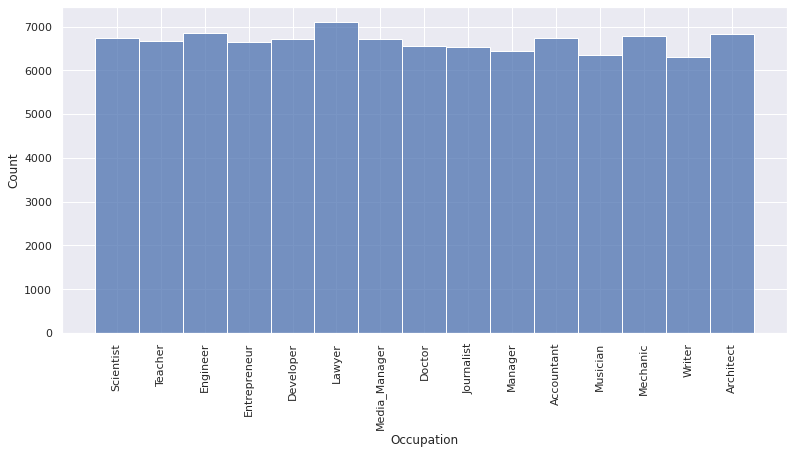

In [9]:
# Plot for viewing the count of occupation
sns.set(rc={'figure.figsize':(13, 6)})
sns.histplot(data=data, x='occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()

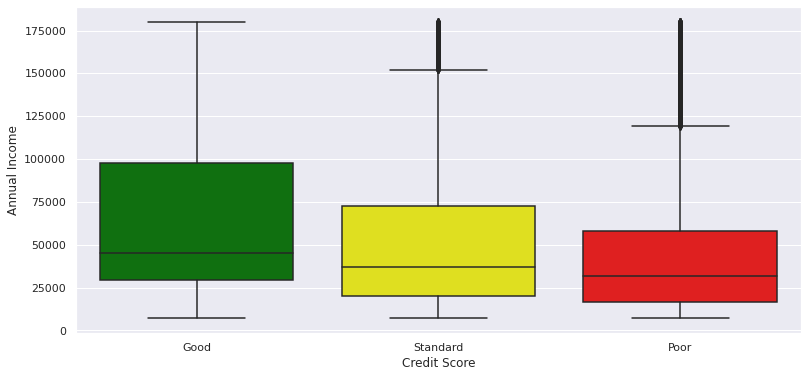

In [10]:
# Plot of annual income with respect to labels
colors = ['green', 'yellow', 'red']
sns.set_palette(colors)

sns.boxplot(data=data, x='credit_score', y='annual_income', palette=colors)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

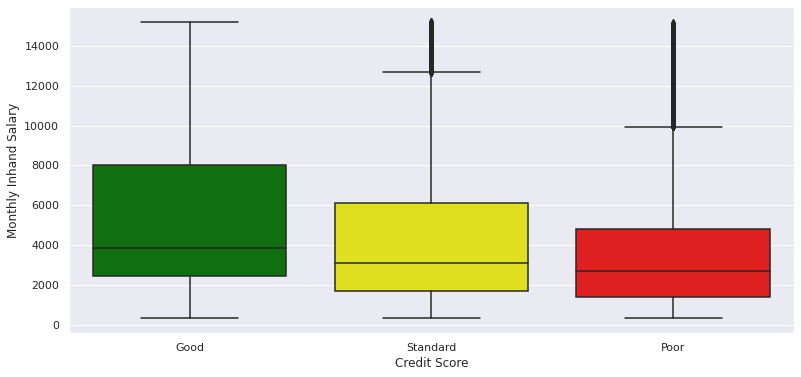

In [11]:
# Plot of Monthly Inhand Salary with respect to labels
colors = ['green', 'yellow', 'red']
sns.set_palette(colors)

sns.boxplot(data=data, x='credit_score', y='monthly_inhand_salary', palette=colors)
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

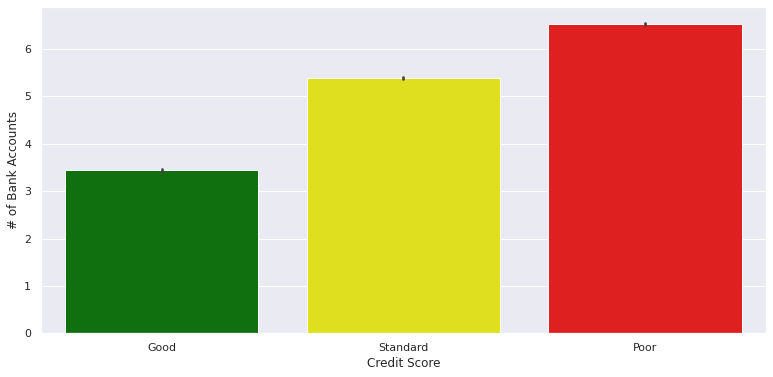

In [12]:
# Plot of Number of Bank Accounts with respect to labels
sns.barplot(data=data, x='credit_score', y='num_bank_accounts')
plt.xlabel('Credit Score')
plt.ylabel('# of Bank Accounts')
plt.show()

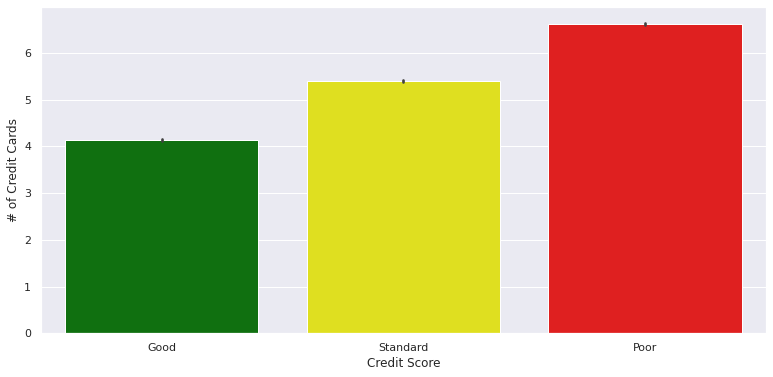

In [13]:
# Plot of Number of Credit Cards with respect to labels
sns.barplot(data=data, x='credit_score', y='num_credit_card')
plt.xlabel('Credit Score')
plt.ylabel('# of Credit Cards')
plt.show()

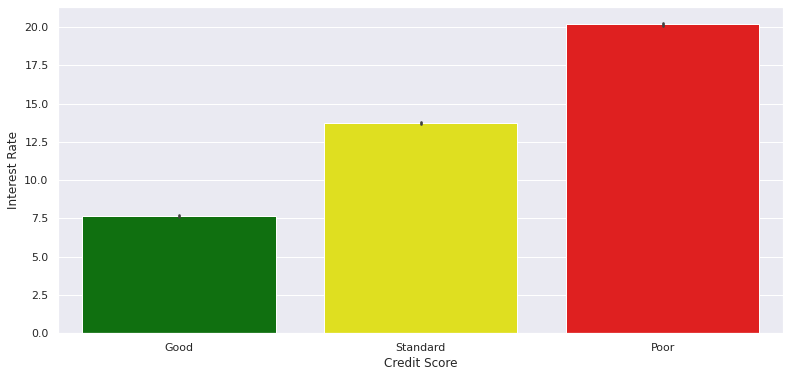

In [14]:
# Plot of Interest Rate with respect to labels
sns.barplot(data=data, x='credit_score', y='interest_rate')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.show()

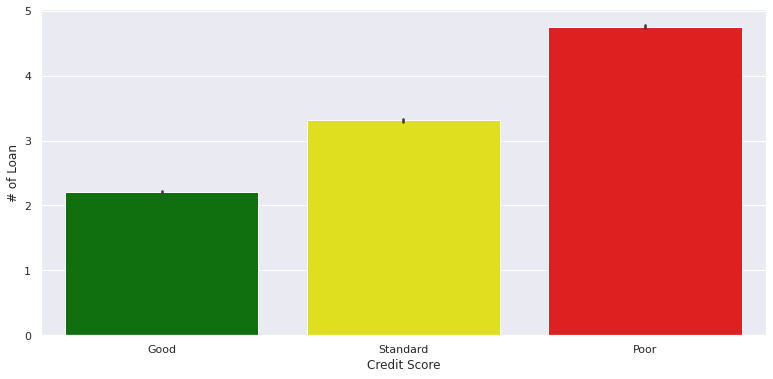

In [15]:
# Plot of Number of Loans with respect to labels
sns.barplot(data=data, x='credit_score', y='num_of_loan')
plt.xlabel('Credit Score')
plt.ylabel('# of Loan')
plt.show()

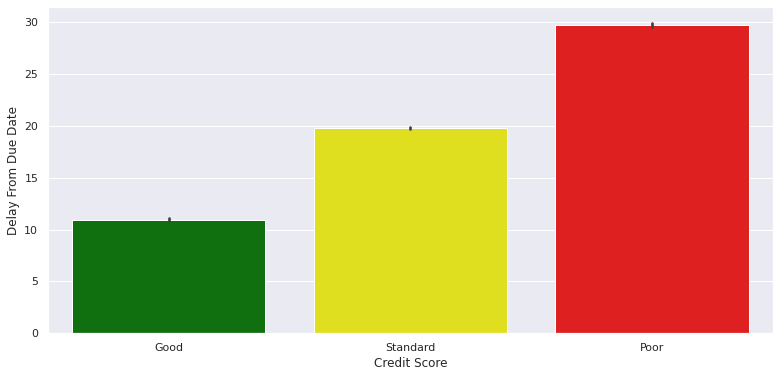

In [16]:
# Plot of delay from due date with respect to labels
sns.barplot(data=data, x='credit_score', y='delay_from_due_date')
plt.xlabel('Credit Score')
plt.ylabel('Delay From Due Date')
plt.show()

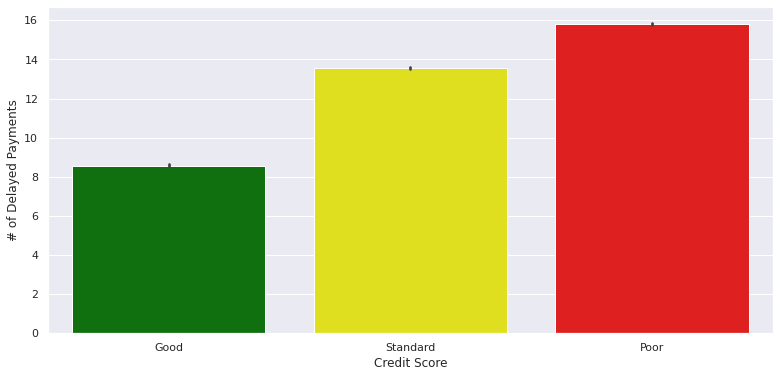

In [17]:
# Plot of Number of deplayed payments with respect to labels
sns.barplot(data=data, x='credit_score', y='num_of_delayed_payment')
plt.xlabel('Credit Score')
plt.ylabel('# of Delayed Payments')
plt.show()

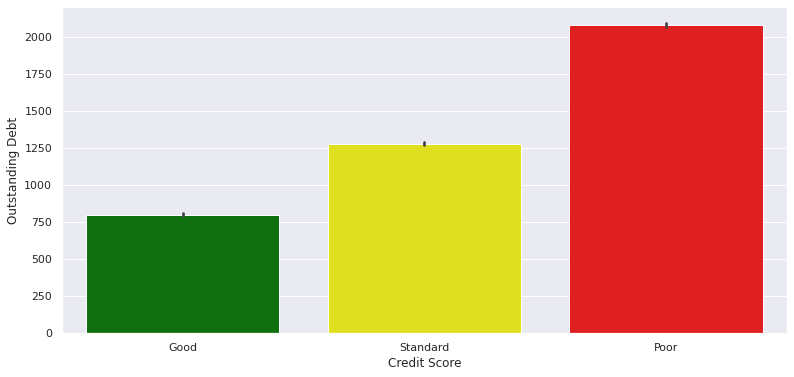

In [18]:
# Plot of Outstanding Debt with respect to labels
sns.barplot(data=data, x='credit_score', y='outstanding_debt')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

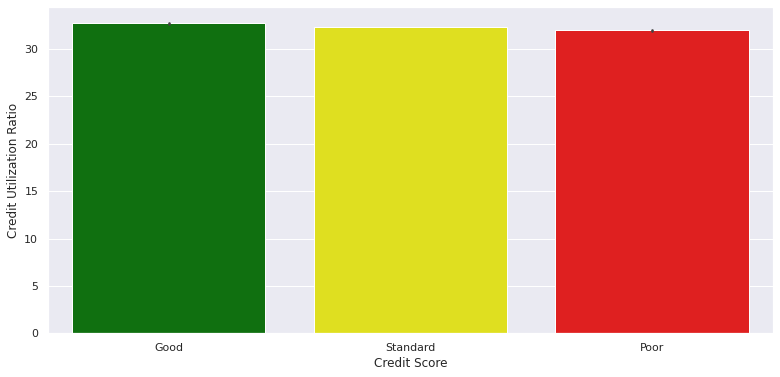

In [19]:
# Plot of Credit utilization ratio with respect to labels
sns.barplot(data=data, x='credit_score', y='credit_utilization_ratio')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

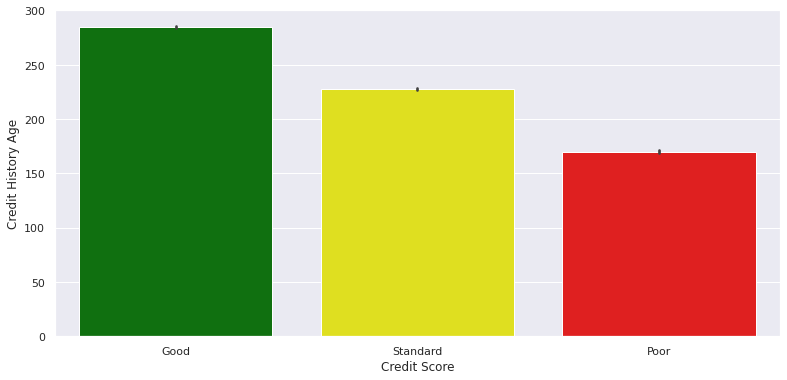

In [20]:
# Plot of Credit history age with respect to labels
sns.barplot(data=data, x='credit_score', y='credit_history_age')
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age')
plt.show()

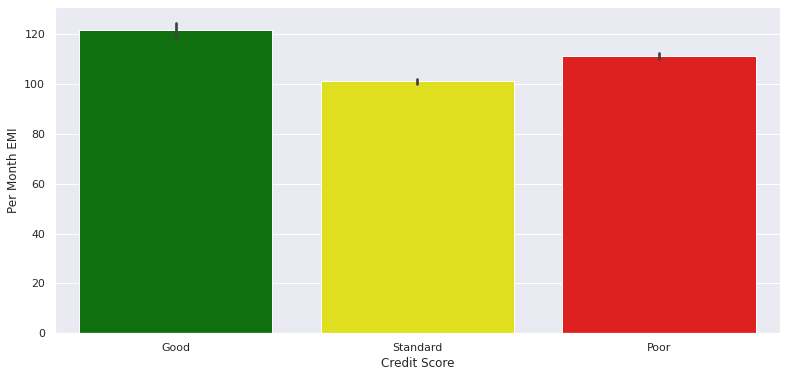

In [21]:
# Plot of Total EMI per month with respect to labels
sns.barplot(data=data, x='credit_score', y='total_emi_per_month')
plt.xlabel('Credit Score')
plt.ylabel('Per Month EMI')
plt.show()

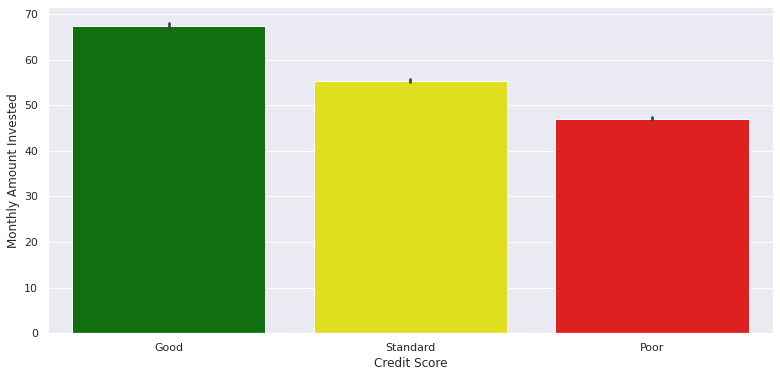

In [22]:
# Plot of Monthly Invested Amount with respect to labels
sns.barplot(data=data, x='credit_score', y='amount_invested_monthly')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Amount Invested')
plt.show()

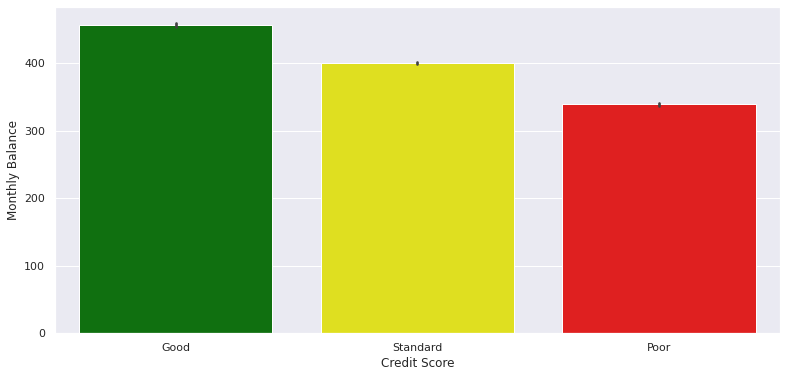

In [23]:
# Plot of Monthly Balance with respect to labels
sns.barplot(data=data, x='credit_score', y='monthly_balance')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Balance')
plt.show()

## Model Training

In [24]:
# Converting `credit_mix` column from object to numbers 
data['credit_mix'] = data['credit_mix'].map({'Standard':1, 'Good':2, 'Bad':0})

In [25]:
# Selecting data for training the model
X = data[['annual_income', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card',
          'interest_rate', 'num_of_loan',
          'delay_from_due_date', 'num_of_delayed_payment',
          'credit_mix', 'outstanding_debt',
          'credit_history_age', 'monthly_balance']]

y = data[['credit_score']]

In [26]:
# Splitting data into training and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Select model for classification
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

<ipython-input-27-15151a5a419a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestClassifier()

## Get Model Predictions

In [28]:
# Get the predictions using trained model
preds = model.predict(xtest)

In [29]:
# View predictions
preds

array(['Good', 'Poor', 'Standard', ..., 'Standard', 'Standard', 'Poor'],
      dtype=object)

## Model Evaluation Matrices

In [30]:
# Calculate the confusion matrix for predictions
conf_matrix = confusion_matrix(ytest, preds)
conf_matrix

array([[2724,   14,  789],
       [  18, 4929,  927],
       [ 770, 1204, 8625]])

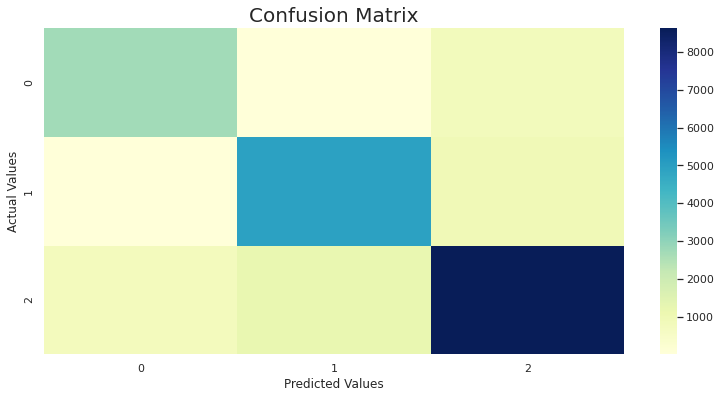

In [31]:
# Build a plot for confusion matrix
sns.heatmap(conf_matrix, cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
# Calculate Accuracy, Precision, Recall and f_score
acc_score = accuracy_score(ytest, preds)
precision_recall_fscore = precision_recall_fscore_support(ytest, preds, average=None)

print('Accuracy Score: ', acc_score)
print('Precision Score: ', precision_recall_fscore[0])
print('Recall Score: ', precision_recall_fscore[1])
print('f_score: ', precision_recall_fscore[2])

Accuracy Score:  0.8139
Precision Score:  [0.77562642 0.80185456 0.8340586 ]
Recall Score:  [0.77232776 0.83912155 0.81375601]
f_score:  [0.77397358 0.82006489 0.82378223]


## Save and Load the Model


In [33]:
# Save the model
pickle.dump(model, open('/content/drive/MyDrive/Projects/credit_score_classification/credit_score_classification.pkl', 'wb'))

In [34]:
# Load the saved model
loaded_model = pickle.load(open('/content/drive/MyDrive/Projects/credit_score_classification/credit_score_classification.pkl', 'rb'))